In [11]:
import numpy as np
import cv2
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [12]:
path = r"C:\Users\cengh\Desktop\dataset\myData"

myList = os.listdir(path)
noOfClasses = len(myList)

print("Label(sınıf) sayısı: ",noOfClasses)


images = []
classNo = []

for i in range(noOfClasses):
    myImageList = os.listdir(path + "\\"+str(i))
    for j in myImageList:
        img = cv2.imread(path + "\\" + str(i) + "\\" + j)
        img = cv2.resize(img, (32,32))
        images.append(img)
        classNo.append(i)
        
print(len(images))
print(len(classNo))

Label(sınıf) sayısı:  10
10160
10160


In [13]:
images = np.array(images)
classNo = np.array(classNo)

print(images.shape)
print(classNo.shape)

# veriyi ayırma
x_train, x_test, y_train, y_test = train_test_split(images, classNo, test_size = 0.5, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

print(images.shape)
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

# # vis 
# fig, axes = plt.subplots(3,1,figsize=(7,7))
# fig.subplots_adjust(hspace = 0.5)
# sns.countplot(y_train, ax = axes[0])
# axes[0].set_title("y_train")

# sns.countplot(y_test, ax = axes[1])
# axes[1].set_title("y_test")

# sns.countplot(y_validation, ax = axes[2])
# axes[2].set_title("y_validation")

# preprocess
def preProcess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img /255
    
    return img

(10160, 32, 32, 3)
(10160,)
(10160, 32, 32, 3)
(4064, 32, 32, 3)
(5080, 32, 32, 3)
(1016, 32, 32, 3)


In [14]:
x_train = np.array(list(map(preProcess, x_train)))
x_test = np.array(list(map(preProcess, x_test)))
x_validation = np.array(list(map(preProcess, x_validation)))

x_train = x_train.reshape(-1,32,32,1)
print(x_train.shape)
x_test = x_test.reshape(-1,32,32,1)
x_validation = x_validation.reshape(-1,32,32,1)

# data generate
dataGen = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             zoom_range = 0.1,
                             rotation_range = 10)

dataGen.fit(x_train)

(4064, 32, 32, 1)


In [15]:
y_train = to_categorical(y_train, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)

model = Sequential()
model.add(Conv2D(input_shape = (32,32,1), filters = 8, kernel_size = (5,5), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D( filters = 16, kernel_size = (3,3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256, activation = "relu" ))
model.add(Dropout(0.2))
model.add(Dense(units=noOfClasses, activation = "softmax" ))

model.compile(loss = "categorical_crossentropy", optimizer=("Adam"), metrics = ["accuracy"])

batch_size = 250

hist = model.fit(dataGen.flow(x_train, y_train, batch_size = batch_size), 
                                        validation_data = (x_validation, y_validation),
                                        epochs = 15,steps_per_epoch = x_train.shape[0]//batch_size, shuffle = 1)

pickle_out = open("model_trained_new.p","wb")
pickle.dump(model, pickle_out)
pickle_out.close()


Epoch 1/15


c:\Users\cengh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.1532 - loss: 2.2650 - val_accuracy: 0.7313 - val_loss: 1.6596
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4280 - loss: 1.9540 - val_accuracy: 0.7028 - val_loss: 1.5984
Epoch 3/15


c:\Users\cengh\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5001 - loss: 1.6825 - val_accuracy: 0.8622 - val_loss: 0.6886
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6000 - loss: 1.1909 - val_accuracy: 0.8750 - val_loss: 0.6532
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6467 - loss: 1.0984 - val_accuracy: 0.9222 - val_loss: 0.3682
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7360 - loss: 0.8791 - val_accuracy: 0.9232 - val_loss: 0.3578
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7677 - loss: 0.7518 - val_accuracy: 0.9232 - val_loss: 0.2673
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8280 - loss: 0.6208 - val_accuracy: 0.9232 - val_loss: 0.2661
Epoch 9/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8094 - loss: 0.6068 - val_accuracy: 0.9409 - val_loss: 0.2080
Epoch 10/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8360 - loss: 0.4567 - val_accuracy: 0.9439 - val_loss: 0.206

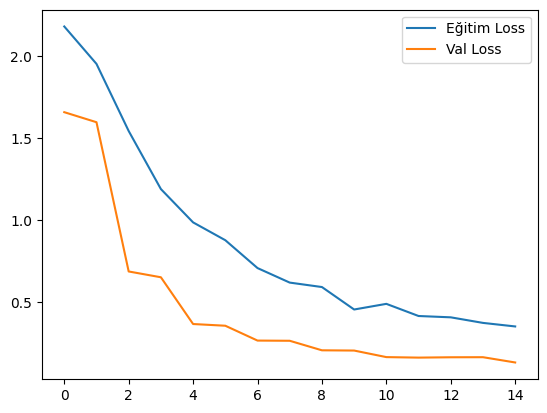

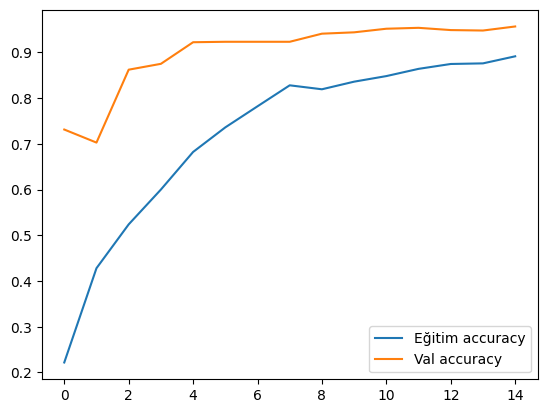

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9619 - loss: 0.1180
Test loss:  0.1295424848794937
Test accuracy:  0.9586614370346069
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


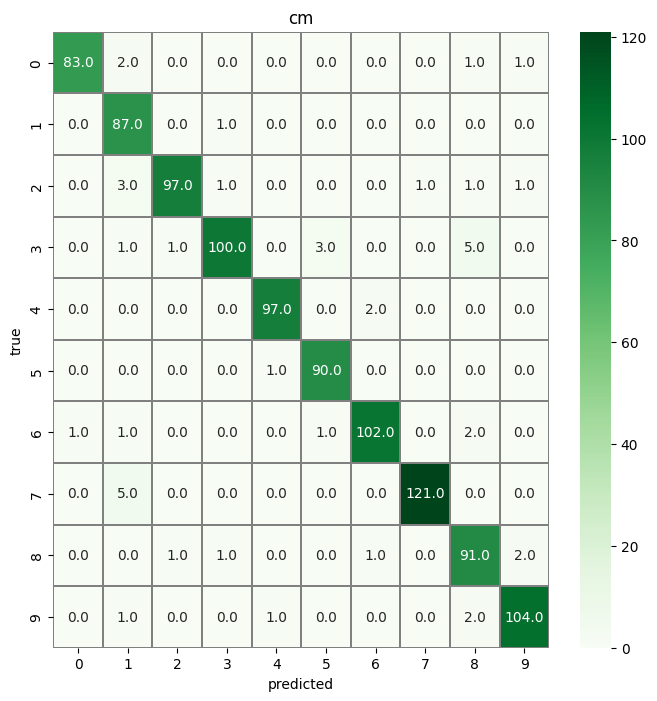

In [16]:
# %% degerlendirme
hist.history.keys()


plt.figure()
plt.plot(hist.history["loss"], label = "Eğitim Loss")
plt.plot(hist.history["val_loss"], label = "Val Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history["accuracy"], label = "Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label = "Val accuracy")
plt.legend()
plt.show()


score = model.evaluate(x_test, y_test, verbose = 1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])


y_pred = model.predict(x_validation)
y_pred_class = np.argmax(y_pred, axis = 1)
Y_true = np.argmax(y_validation, axis = 1)
cm = confusion_matrix(Y_true, y_pred_class)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot = True, linewidths = 0.01, cmap = "Greens", linecolor = "gray", fmt = ".1f", ax=ax)
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("cm")
plt.show()